In [52]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter

global static #增加一個全域變數用來紀錄統計結果
static={}

In [53]:
import _thread
import time
import threading

In [54]:
with open('./wordlen.txt') as f: #打開我們要比對的字典檔
    wordlen = f.read().split('\n')
del wordlen[0]
wordlen[:10] 

['C', 'C++', 'C#', 'PYTHON', 'JAVA', 'JAVASCRIPT', 'PHP', 'HTML', 'SQL', 'CSS']

In [55]:
def inner_word(url): #一個用來分析內頁的function
    
    inner = requests.get(url)  #用get連到網頁
    innersoup = BeautifulSoup(inner.text, 'lxml')  #放到BeautifulSoup解析
    innerselect2 = str(innersoup.select_one('div.job-detail-box > dl')).upper()  
    #找到可能會出現找尋目標的區塊將全部英文變大寫
    innerselect = str(innersoup.select_one('div.> p')).upper()
    #同上
    lan1=re.findall('[A-Z]+[+#?]*' , innerselect)
    #用正規法抓出每個英文單字
    lan2=re.findall('[A-Z]+[+#?]*' , innerselect2)
    #同上 第二區塊的
    lan1.extend(lan2)
    #將兩個list合併
    if 'HTML#' in lan1:
        lan1.remove('HTML#')
    #排除調內文出現的雜訊
    if 'HTML?' in lan1:
        lan1.remove('HTML?')
    #雜訊2
    lan1 = list(set(lan1))
    #清除調list內重複的部份
    
    for i in lan1: #將每個元素都跑過 內容會顯示在i
        if i in wordlen: #如果list裡面的字有出現在我們的字典檔中
            if i in static:  #如果static已經有這個字 就在value+1
                static[i] += 1
            else:
                static[i] = 1 #如果static統計的字典檔還沒有這個字 就新增
    return static


In [56]:
def page(url):  #這是用來抓出搜尋畫面中所有的case連結
    res = requests.get(url)
    time.sleep(0.5)
    soup = BeautifulSoup(res.text, 'lxml')
    time.sleep(0.5)
    links = soup.select('li.title > a')
    for link in links:
        inner_word(str(link['href']))#把取得的連結丟到上面inner_word function去解析
        print("%s" %  link['href'])
        print("=" * 50)
    return static
    

In [57]:
# https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&jobcat=2007000000&order=2&asc=0&page=1'
class MyClass (threading.Thread): #多線程處理
    def __init__(self,number):
        threading.Thread.__init__(self)
        self.number=number
    def run(self): 
        print(('start'+str(self.number)+' '))
        page('https://www.518.com.tw/job-index-P-'+str(self.number)+'.html?i=1&am=1&ab=2032001,2032002,') 
        print(('finish'+str(self.number)+' '))
        time.sleep(0.5)

In [58]:
threads=[]
for i in range(1,54+1): 
    Thread=MyClass(i)
    threads.append(Thread)
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

start1 
start2 
start3 
start4 
start5 
start6 
start7 start8 

start9 
start10 
start11 
start12 
start13 
start14 
start15 
start16 
start17 
start18 
start19 
start20 
start21 
start22 
start23 
start25 
start26 
start24 
start27 start28 

start29 
start30 
start32 
start33 
start34 
start31 start35 

start36 
start37 
start38 
start39 
start40 
start41 
start42 start43 

start44 
start46 start45 

start47 start48 start49 

start50 
start51 
start52 
start53 
start54 

https://www.518.com.tw/Windows AP工程師-台中市-南屯區-job-671951.html?kw=&pi=40
https://www.518.com.tw/技術部_IOS資深軟體工程師-台北市-松山區-job-1167387.html?kw=&pi=5
https://www.518.com.tw/C++資深軟體工程師-台中市-西區-job-883813.html?kw=&pi=51
https://www.518.com.tw/軟體應用工程師-台中市-豐原區-job-1190935.html?kw=&pi=43
==================================================https://www.518.com.tw/))MS(( 免二試 龜山 週休二日 組裝測試員-桃園市-龜山區-job-1346542.html?kw=&pi=8

https://www.518.com.tw/MIS網管(駐點香港)-中國-香港區-job-1349006.html?kw=&pi=1
https://www.518.com.tw/川流資訊-Wordpress網站程式工程師(不

https://www.518.com.tw/初級程式設計工程師-台北市-中山區-job-831168.html?kw=&pi=21https://www.518.com.tw/機械軟體工程師-台中市-大里區-job-1163095.html?kw=&pi=18

https://www.518.com.tw/服務專員-桃園市-桃園市-全區-job-1294940.html?kw=&pi=28
https://www.518.com.tw/駐點工程師-台北市-全區-job-932430.html?kw=&pi=27
https://www.518.com.tw/TIPTOP項目經理-新北市-深坑區-job-1280994.html?kw=&pi=54https://www.518.com.tw/網拍人員-彰化縣-大村鄉-job-764709.html?kw=&pi=11
https://www.518.com.tw/網站美編專員-新北市-泰山區-job-797249.html?kw=&pi=53==================================================


https://www.518.com.tw/程式設計師-台中市-西屯區-job-1252594.html?kw=&pi=32
https://www.518.com.tw/世大運 資通處設備組 行政專員-台北市-松山區-job-1348119.html?kw=&pi=8
https://www.518.com.tw/測試文管人員-台北市-南港區-job-251907.html?kw=&pi=39==================================================



https://www.518.com.tw/專案實習生-桃園市-桃園區-job-1118292.html?kw=&pi=37https://www.518.com.tw/程式設計師-新北市-樹林區-job-381205.html?kw=&pi=51
https://www.518.com.tw/軟體工程師 (IOS Android 前端開發)-台北市-大安區-job-1074501.html?kw=&pi=36===============================

https://www.518.com.tw/電子工程師-新竹市-東區-job-929422.html?kw=&pi=7
https://www.518.com.tw/韌體電控工程師-台北市-內湖區-job-854202.html?kw=&pi=16
https://www.518.com.tw/排班隔週休.誠徵有經驗專業,網站架設與更新維護管理.改版-台北市-大安區-job-803828.html?kw=&pi=54
https://www.518.com.tw/軟體工程師-新北市-樹林區-job-1079213.html?kw=&pi=15
https://www.518.com.tw/系統分析師 SA-台北市-信義區-job-1337496.html?kw=&pi=5
https://www.518.com.tw/Flash Builder 設計師-桃園市-中壢區-job-763179.html?kw=&pi=38
https://www.518.com.tw/電機技術工程師-台南市-東區-job-1088088.html?kw=&pi=44https://www.518.com.tw/烘焙教室助理-台中市-潭子區-job-1325408.html?kw=&pi=41

https://www.518.com.tw/軟體(系統開發)工程師-台北市-南港區-job-685104.html?kw=&pi=45
https://www.518.com.tw/Android Developer-高雄市-前鎮區-job-1329437.html?kw=&pi=13
https://www.518.com.tw/機電工程師-新北市-樹林區-job-1355556.html?kw=&pi=1
https://www.518.com.tw/系統客服測試人員-台北市-信義區-job-767716.html?kw=&pi=36https://www.518.com.tw/台安藥局 - 高雄七賢店 - 行政藥師助理-高雄市-鳳山區-job-973941.html?kw=&pi=9

https://www.518.com.tw/Internet程式設計師-台中市-西屯區-job-1185018.html?kw=&pi=48
https://www.518.com.tw/專案經理-台

https://www.518.com.tw/Android工程師-台北市-松山區-job-1329239.html?kw=&pi=17
https://www.518.com.tw/Android App開發工程師-台北市-內湖區-job-1293108.html?kw=&pi=14
https://www.518.com.tw/設備操作員-台南市-仁德區-job-947341.html?kw=&pi=53
https://www.518.com.tw/程式設計師-台北市-信義區-job-767711.html?kw=&pi=36


https://www.518.com.tw/.NET 軟體專案開發主管-台北市-松山區-job-1033422.html?kw=&pi=3
https://www.518.com.tw/資訊人員-台北市-內湖區-job-1161221.html?kw=&pi=29
https://www.518.com.tw/網路工程師-桃園市-蘆竹區-job-1312629.html?kw=&pi=22
https://www.518.com.tw/電子工程師 (台北營服人員)-台北市-全區-job-908295.html?kw=&pi=18
https://www.518.com.tw/cocos2d,iOS,Android遊戲程式設計Zuma-台北市-南港區-job-797732.html?kw=&pi=35
https://www.518.com.tw/設備技術工程主管-台中市-西區-job-1256498.html?kw=&pi=40https://www.518.com.tw/網路管理工程師-台北市-信義區-job-1107805.html?kw=&pi=47
https://www.518.com.tw/服飾網拍人員-台北市-信義區-job-969947.html?kw=&pi=19

https://www.518.com.tw/Android 工程師-台北市-松山區-job-1324086.html?kw=&pi=23https://www.518.com.tw/App開發工程師(iOS Android)-台中市-西區-job-1242885.html?kw=&pi=27https://www.518.com.tw/網頁設計師(

https://www.518.com.tw/網站前端工程師-新竹市-香山區-job-1092993.html?kw=&pi=29
https://www.518.com.tw/Mobile APP應用開發工程師-台北市-南港區-job-963752.html?kw=&pi=47https://www.518.com.tw/電腦維修工程師-台中市-南區-job-1330253.html?kw=&pi=49

==================================================https://www.518.com.tw/韌體工程師-台中市-西區-job-729374.html?kw=&pi=31
https://www.518.com.tw/技術人員-台中市-北屯區-job-602403.html?kw=&pi=33==================================================

https://www.518.com.tw/國內業務-台北市-北投區-job-444440.html?kw=&pi=10

https://www.518.com.tw/工程師-桃園市-平鎮區-job-953319.html?kw=&pi=52
https://www.518.com.tw/日本 大手運動用品公司 -IT部門主管--其它亞洲-東北亞-job-1346687.html?kw=&pi=5
https://www.518.com.tw/MIS 資訊人員-台北市-中正區-job-1323926.html?kw=&pi=19https://www.518.com.tw/軟體工程師-新竹市-東區-job-1151138.html?kw=&pi=40https://www.518.com.tw/IOS工程師-台北市-松山區-job-1324085.html?kw=&pi=23https://www.518.com.tw/軟體程式設計工程師助理-高雄市-三民區-job-1331008.html?kw=&pi=4






https://www.518.com.tw/軟體設計工程師-台中市-大雅區-job-735132.html?kw=&pi=51
https://www.518.com.tw/GPS、GIS程式開發

https://www.518.com.tw/SAP工程師-桃園市-觀音區-job-851093.html?kw=&pi=34
https://www.518.com.tw/APP程式設計師-台北市-中正區-job-1108692.html?kw=&pi=30
https://www.518.com.tw/網路應用與管理-台中市-北屯區-job-1313288.html?kw=&pi=50
https://www.518.com.tw/中華電信商務應用資訊助理-台北市-中正區-job-1351201.html?kw=&pi=8
https://www.518.com.tw/APP程式設計師-南投縣-南投市-job-913570.html?kw=&pi=32
https://www.518.com.tw/Unity遊戲開發工程師-台北市-中山區-job-1211727.html?kw=&pi=46https://www.518.com.tw/網拍小幫手工讀計時人員  早班10-18-新北市-汐止區-job-1000915.html?kw=&pi=21
==================================================https://www.518.com.tw/會架網站.露天拍賣.雅虎有伙食津貼有勞健保-台北市-大安區-job-844017.html?kw=&pi=54

https://www.518.com.tw/行動應用程式設計主管-新竹市-東區-job-793839.html?kw=&pi=25
https://www.518.com.tw/專案經理(Project Manager)-台北市-內湖區-job-660732.html?kw=&pi=48
https://www.518.com.tw/資料庫工程師-台北市-信義區-job-203102.html?kw=&pi=42

https://www.518.com.tw/工讀生-高雄市-苓雅區-job-459779.html?kw=&pi=6
https://www.518.com.tw/網站設計工程師-彰化縣-福興鄉-job-1209027.html?kw=&pi=53
https://www.518.com.tw/ASP NET軟體工程師-台北市-大安區-job-106

==================================================https://www.518.com.tw/中壢 萬能科大 倉管人員 8H 週休-桃園市-中壢區-job-1352881.html?kw=&pi=8https://www.518.com.tw/軟體開發工程師-新北市-板橋區-job-1318860.html?kw=&pi=15



https://www.518.com.tw/維護助理工程師-新北市-全區-job-802117.html?kw=&pi=7
https://www.518.com.tw/研發工程師(宜蘭) 研發助理工程師(宜蘭)-宜蘭縣-員山鄉-job-1346338.html?kw=&pi=9
https://www.518.com.tw/急徵網拍小幫手 熟電腦先錄取 近逢甲-台中市-西屯區-job-1132751.html?kw=&pi=24https://www.518.com.tw/工程師助理-新北市-永和區-job-1250916.html?kw=&pi=36https://www.518.com.tw/Internet 資深程式設計師-新竹縣-竹北市-job-1071054.html?kw=&pi=6https://www.518.com.tw/網頁設計師-台北市-大安區-job-250169.html?kw=&pi=2==================================================







https://www.518.com.tw/IT人員 硬體工程師-台中市-北區-job-1350558.html?kw=&pi=11
https://www.518.com.tw/物聯網平台軟體工程師-台北市-內湖區-job-716129.html?kw=&pi=12
==================================================https://www.518.com.tw/程式設計師-高雄市-鼓山區-job-876799.html?kw=&pi=43==================================================


https://www.518.com.tw/系統整合工程師-台


https://www.518.com.tw/巨量數據探勘工程師-台北市-南港區-job-1079880.html?kw=&pi=23
https://www.518.com.tw/高級 資深資料庫程式設計師(研發二部)-台北市-內湖區-job-1329321.html?kw=&pi=3https://www.518.com.tw/系統軟體設計工程師-台北市-南港區-job-858280.html?kw=&pi=39https://www.518.com.tw/電腦維修班務行政人員(虎尾認證中心)-雲林縣-虎尾鎮-job-1046151.html?kw=&pi=43==================================================




https://www.518.com.tw/Windows Phone 軟體工程師-台北市-大安區-job-745505.html?kw=&pi=9
==================================================https://www.518.com.tw/網頁平台開發人員-台北市-中山區-job-737380.html?kw=&pi=10

https://www.518.com.tw/大專學士工讀生區域業務3年以上經驗-桃園市-中壢區-job-1295225.html?kw=&pi=41https://www.518.com.tw/繪圖人員-台中市-北區-job-942365.html?kw=&pi=30
https://www.518.com.tw/網站設計工作伙伴(儲備幹部)-新北市-樹林區-job-745841.html?kw=&pi=4
https://www.518.com.tw/Android apps 開發工程師-新竹市-東區-job-793856.html?kw=&pi=16

https://www.518.com.tw/產品經理Product Manager-台北市-松山區-job-1290693.html?kw=&pi=27
https://www.518.com.tw/ASP.NET MVC 軟體工程師-台北市-信義區-job-820887.html?kw=&pi=18
https://www.518.com.tw/Senior

https://www.518.com.tw/MIS IT工程師-台北市-松山區-job-1270579.html?kw=&pi=27https://www.518.com.tw/軟體工程師(科學計算,台北)-台北市-大安區-job-1159162.html?kw=&pi=46
https://www.518.com.tw/777-(湖口)全新宿舍 月休10天 免輪班,際-新竹縣-新豐鄉-job-1337709.html?kw=&pi=2
https://www.518.com.tw/定點駐站人員-台北市-士林區-job-1323230.html?kw=&pi=16

https://www.518.com.tw/自動化C 程式設計工程師(新北)-新北市-五股區-job-1107572.html?kw=&pi=42https://www.518.com.tw/網拍小幫手-桃園市-八德區-job-263714.html?kw=&pi=52

https://www.518.com.tw/電子工程師-台中市-南區-job-444095.html?kw=&pi=14https://www.518.com.tw/RWD網頁設計切版-台中市-北區-job-318456.html?kw=&pi=1https://www.518.com.tw/PHP網站程式設計師-新北市-新莊區-job-994970.html?kw=&pi=29====================================================================================================





https://www.518.com.tw/App開發工程師-宜蘭縣-宜蘭市-job-1089877.html?kw=&pi=32https://www.518.com.tw/美工助理-台北市-信義區-job-1264356.html?kw=&pi=13
https://www.518.com.tw/軟體工程師(C .NET)-嘉義縣-中埔鄉-job-713702.html?kw=&pi=39

https://www.518.com.tw/網頁設計師-高雄市-仁武區-job-1293901.html?kw=&pi=7
https://www.

https://www.518.com.tw/APP PM SA-台北市-松山區-job-1227531.html?kw=&pi=35
https://www.518.com.tw/軟體設計助理工程師-台南市-安平區-job-1039804.html?kw=&pi=45


https://www.518.com.tw/3C配件銷售門市工讀生-台中市-西屯區-job-1227718.html?kw=&pi=51https://www.518.com.tw/內勤-行政,企劃,資訊人員-台北市-大安區-job-1275394.html?kw=&pi=1

https://www.518.com.tw/.NET軟體工程師(新竹)-新竹市-東區-job-671763.html?kw=&pi=20
https://www.518.com.tw/電腦系統工程師-台北市-內湖區-job-852516.html?kw=&pi=38
https://www.518.com.tw/[KSD]路竹長期資管工讀生 週休二日(對電腦有興趣者)-高雄市-路竹區-job-662156.html?kw=&pi=8
https://www.518.com.tw/App開發工程師-台中--台中市-南區-job-1262525.html?kw=&pi=28
https://www.518.com.tw/電子商務平台後台JAVA開發工程師-新竹縣-竹北市-job-1151048.html?kw=&pi=17
https://www.518.com.tw/軟體工程人員-台北市-信義區-job-1128641.html?kw=&pi=6
https://www.518.com.tw/軟體工程師-桃園市-蘆竹區-job-1312935.html?kw=&pi=50
https://www.518.com.tw/資訊人員-宜蘭縣-宜蘭市-job-1291439.html?kw=&pi=34https://www.518.com.tw/工讀生-高雄市-苓雅區-job-996012.html?kw=&pi=40https://www.518.com.tw/Drupal 網站開發助理工程師(後端)-台北市-大安區-job-1174327.html?kw=&pi=5
===========================

https://www.518.com.tw/軟體工程師-新北市-汐止區-job-735999.html?kw=&pi=25
https://www.518.com.tw/資深資訊管理人員10年以上經驗-桃園市-中壢區-job-1295235.html?kw=&pi=18
https://www.518.com.tw/系統分析師-互聯網+服務事業處-台北市-中山區-job-1219050.html?kw=&pi=41
https://www.518.com.tw/資安測試工讀生-台北市-中山區-job-1343600.html?kw=&pi=9==================================================

https://www.518.com.tw/主管助理兼資訊-彰化縣-秀水鄉-job-964226.html?kw=&pi=48https://www.518.com.tw/電腦維修工程師 _(全職)-台中市-北屯區-job-64055.html?kw=&pi=50

https://www.518.com.tw/網站商品上架人員-台北市-中正區-job-1172298.html?kw=&pi=2
==================================================https://www.518.com.tw/軟軔體工程師-苗栗縣-竹南鎮-job-22239.html?kw=&pi=21
==================================================https://www.518.com.tw/會計(具網拍經驗網站行銷企劃後台管理者)可兼-高雄市-鼓山區-job-952113.html?kw=&pi=5
==================================================https://www.518.com.tw/軟體測試工程師 QA Engineer-台北市-內湖區-job-1170622.html?kw=&pi=19https://www.518.com.tw/網路部落社群維護-桃園市-蘆竹區-job-621189.html?kw=&pi=36



https://www.518.com.tw/Lotus Notes

https://www.518.com.tw/軟體測試工程師-新北市-新莊區-job-862488.html?kw=&pi=45
https://www.518.com.tw/網路駐點工程師-台北市-內湖區-job-1316867.html?kw=&pi=26
https://www.518.com.tw/韌體工程師(B)-台北市-內湖區-job-843234.html?kw=&pi=54
https://www.518.com.tw/專案助理, 專案特助-台北市-中山區-job-192492.html?kw=&pi=3==================================================

https://www.518.com.tw/Windows 客服工程師-新北市-三重區-job-989071.html?kw=&pi=43https://www.518.com.tw/程式設計工程師-台中市-南屯區-job-737722.html?kw=&pi=35
https://www.518.com.tw/前端網頁程式設計師FrontEndWeb Developer-台北市-內湖區-job-609747.html?kw=&pi=29https://www.518.com.tw/BIOS研發工程師-台北市-內湖區-job-852429.html?kw=&pi=38

https://www.518.com.tw/資訊專員-彰化縣-彰化市-job-1187051.html?kw=&pi=7
https://www.518.com.tw/電子工程師(軟體)-台北市-信義區-job-6991.html?kw=&pi=53==================================================


https://www.518.com.tw/(中科)自動化機械設備-軟體設計工程師(全職代徵)-台中市-后里區-job-1342732.html?kw=&pi=8
https://www.518.com.tw/UnityVR遊戲程式設計師-台北市-大安區-job-1315378.html?kw=&pi=6https://www.518.com.tw/PLC軟體設計-新北市-樹林區-job-696511.html?kw=&pi=

https://www.518.com.tw/影像處理工程師-新北市-新店區-job-659179.html?kw=&pi=39https://www.518.com.tw/弱電工程人員-新北市-新莊區-job-92020.html?kw=&pi=29https://www.518.com.tw/軟件開發工程師-台北市-松山區-job-876473.html?kw=&pi=37https://www.518.com.tw/KEY IN工讀生-桃園市-桃園區-job-1340728.html?kw=&pi=7

https://www.518.com.tw/韌體設計工程師-台南市-後璧區-job-525382.html?kw=&pi=30https://www.518.com.tw/MIS 網管主管-新北市-汐止區-job-1243011.html?kw=&pi=10
https://www.518.com.tw/PHP程式設計師-台中市-西屯區-job-1190940.html?kw=&pi=4
https://www.518.com.tw/軟體工程師-台北市-松山區-job-963920.html?kw=&pi=2


https://www.518.com.tw/知名電信_網頁設計人員(起薪26,000-30,000)_內湖-台北市-內湖區-job-1160855.html?kw=&pi=15

https://www.518.com.tw/軟體研發工程師-台北市-內湖區-job-1014671.html?kw=&pi=17
https://www.518.com.tw/網站平台工程師-台北市-中山區-job-1306322.html?kw=&pi=9
https://www.518.com.tw/短期約聘計時內勤人員-新北市-板橋區-job-1285860.html?kw=&pi=14
https://www.518.com.tw/電腦系統維護人員-新北市-土城區-job-490752.html?kw=&pi=24
==================================================https://www.518.com.tw/航站系統維護駐點人員-台北市-松山區-job-928801.html?kw=&pi=49

https

https://www.518.com.tw/網路系統工程師-商軟高雄-高雄市-前鎮區-job-1219032.html?kw=&pi=41
https://www.518.com.tw/資安客服專員-台北市-中山區-job-1346262.html?kw=&pi=17https://www.518.com.tw/公家機關-資訊人員-新北市-新莊區-job-1116828.html?kw=&pi=7

https://www.518.com.tw/程式設計師-台中市-全區-job-1349318.html?kw=&pi=18
https://www.518.com.tw/Google Android 手機App 開發人員-台北市-大同區-job-865557.html?kw=&pi=50
https://www.518.com.tw/川流資訊-網站程式狂人(正職)(官網web5000.com.tw)-台中市-西屯區-job-1099474.html?kw=&pi=32
https://www.518.com.tw/PHP程式設計師-台中市-北屯區-job-905341.html?kw=&pi=49
https://www.518.com.tw/System Analyst-台北市-內湖區-job-1170598.html?kw=&pi=19
https://www.518.com.tw/資訊助理人員-桃園市-楊梅區-job-722056.html?kw=&pi=33
https://www.518.com.tw/軟體工程師-台南市-佳里區-job-740881.html?kw=&pi=44
https://www.518.com.tw/系統工程師-新北市-汐止區-job-1130758.html?kw=&pi=53
https://www.518.com.tw/技術工程人員-桃園市-中壢區-job-664507.html?kw=&pi=48
https://www.518.com.tw/Java 軟體工程師[台北]-新北市-板橋區-job-697323.html?kw=&pi=54https://www.518.com.tw/研發工程師-新北市-林口區-job-1223163.html?kw=&pi=5

https://www.518.com.tw/軟體業務-彰化

https://www.518.com.tw/資訊幹部(國光店)-台中市-大里區-job-854606.html?kw=&pi=28https://www.518.com.tw/資訊部專員-台北市-大安區-job-257987.html?kw=&pi=1

https://www.518.com.tw/資料庫管理員-台北市-內湖區-job-1213997.html?kw=&pi=16
https://www.518.com.tw/網路管理工程師-台中市-西屯區-job-1251995.html?kw=&pi=27==================================================
https://www.518.com.tw/IT及MIS工程師-台北市-大同區-job-1353473.html?kw=&pi=3https://www.518.com.tw/初階JAVA工程師-台北市-文山區-job-849205.html?kw=&pi=8

https://www.518.com.tw/行政助理或資訊助理-台中市-西區-job-679485.html?kw=&pi=52http://case.518.com.tw/casepage-detail-124806.html?from=518&a_id=2183


https://www.518.com.tw/知名三大電信-資訊營運助理-台北市-松山區-job-974813.html?kw=&pi=15
https://www.518.com.tw/網站開發工程師-台北市-信義區-job-815582.html?kw=&pi=35
https://www.518.com.tw/兼職-APP程式設計師-台北市-大同區-job-1097207.html?kw=&pi=50
https://www.518.com.tw/網管資料庫人員-台北市-松山區-job-1283437.html?kw=&pi=5
https://www.518.com.tw/IOS軟體設計工程師-新北市-三重區-job-1212106.html?kw=&pi=21
https://www.518.com.tw/PLM系統分析師【林口】-桃園市-龜山區-job-860358.html?kw=&pi=23https://www


https://www.518.com.tw/通訊工程師 、電腦工程師 、水電半技工-宜蘭縣-宜蘭市-job-950444.html?kw=&pi=11https://www.518.com.tw/程式設計師(台北)-台北市-中正區-job-863111.html?kw=&pi=14==================================================



http://case.518.com.tw/casepage-detail-124546.html?from=518&a_id=2183https://www.518.com.tw/弱電工程技術員-台中市-北區-job-1009862.html?kw=&pi=38

https://www.518.com.tw/系統程式設計師[台北]-新北市-板橋區-job-697318.html?kw=&pi=29
https://www.518.com.tw/資訊部專員[學生實習]-台北市-大安區-job-1236594.html?kw=&pi=1
https://www.518.com.tw/Internet程式設計師-高雄市-全區-job-1165080.html?kw=&pi=24
https://www.518.com.tw/銷售顧問-新竹縣-竹北市-job-17739.html?kw=&pi=36
http://case.518.com.tw/casepage-detail-124743.html?from=518&a_id=2183
https://www.518.com.tw/系統維護工程師-台中市-西屯區-job-278763.html?kw=&pi=15
https://www.518.com.tw/Internet程式設計師 PHP程式設計師-高雄市-鼓山區-job-744079.html?kw=&pi=23
https://www.518.com.tw/資訊工程師-高雄市-前金區-job-743254.html?kw=&pi=20==================================================
https://www.518.com.tw/技術部_PHP軟體工程師-台北市-松山區-job-1196617.html?kw=&pi=4=

http://case.518.com.tw/casepage-detail-124365.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-124260.html?from=518&a_id=2183

http://case.518.com.tw/casepage-detail-122715.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-123444.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-123109.html?from=518&a_id=2183
finish39 
http://case.518.com.tw/casepage-detail-123509.html?from=518&a_id=2183
finish33 
http://case.518.com.tw/casepage-detail-124254.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-122894.html?from=518&a_id=2183

finish17 
http://case.518.com.tw/casepage-detail-123800.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-122459.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124542.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-122815.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124265.html?from=518&a_id=2183
==================================================http://cas

http://case.518.com.tw/casepage-detail-124614.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124594.html?from=518&a_id=2183==================================================

finish9 
finish10 

http://case.518.com.tw/casepage-detail-122640.html?from=518&a_id=2183
finish47 
http://case.518.com.tw/casepage-detail-123958.html?from=518&a_id=2183
finish24 
http://case.518.com.tw/casepage-detail-123370.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124136.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-122714.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-122578.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-122920.html?from=518&a_id=2183
finish42 
http://case.518.com.tw/casepage-detail-124200.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-123158.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124809.html?from=518&a_id=2183==================================================

=========

In [59]:
static
#結果

{'C': 125,
 'C#': 106,
 'C++': 126,
 'CSS': 138,
 'DELPHI': 4,
 'DNS': 13,
 'FTP': 7,
 'HTML': 205,
 'JAVA': 203,
 'JAVASCRIPT': 69,
 'MYSQL': 193,
 'PERL': 6,
 'PHP': 172,
 'PYTHON': 9,
 'R': 3,
 'RUBY': 3,
 'SQL': 168,
 'SWIFT': 7}

In [60]:
# sorted(static.items(),key=lambda item:

In [61]:
dictlanguage= sorted(static.items(), key=lambda d:d[1],reverse=True)
dictlanguage


[('HTML', 205),
 ('JAVA', 203),
 ('MYSQL', 193),
 ('PHP', 172),
 ('SQL', 168),
 ('CSS', 138),
 ('C++', 126),
 ('C', 125),
 ('C#', 106),
 ('JAVASCRIPT', 69),
 ('DNS', 13),
 ('PYTHON', 9),
 ('FTP', 7),
 ('SWIFT', 7),
 ('PERL', 6),
 ('DELPHI', 4),
 ('R', 3),
 ('RUBY', 3)]

In [62]:
# import numpy as np
# import pylab as pl
 
# # make an array of random numbers with a gaussian distribution with
# # mean = 5.0
# # rms = 3.0
# # number of points = 1000
# data = dictlanguage.values()
 
# # make a histogram of the data array
# pl.hist(data)
 
# # make plot labels
# pl.xlabel('data')
# pl.show()

In [63]:
type(dictlanguage)

list

In [64]:
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

language = OrderedDict(dictlanguage)
language

OrderedDict([('HTML', 205),
             ('JAVA', 203),
             ('MYSQL', 193),
             ('PHP', 172),
             ('SQL', 168),
             ('CSS', 138),
             ('C++', 126),
             ('C', 125),
             ('C#', 106),
             ('JAVASCRIPT', 69),
             ('DNS', 13),
             ('PYTHON', 9),
             ('FTP', 7),
             ('SWIFT', 7),
             ('PERL', 6),
             ('DELPHI', 4),
             ('R', 3),
             ('RUBY', 3)])

In [65]:
type(language)

collections.OrderedDict

In [66]:
xticks = np.arange(len(language)) 
xticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

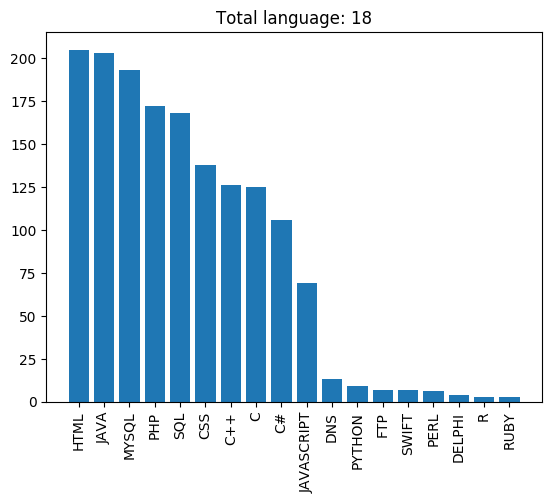

In [67]:
plt.bar(xticks, language.values(), align='center')

plt.xticks(xticks, list(language.keys()))  # 預設 X 座標數字，改顯示水果名
plt.title("Total language: %d" % len(language))  # 給標題
plt.xticks(rotation=90)
plt.show()  # 秀出圖。不一定需要，例如在 inline 模式就不需要


In [68]:
# """
# ====================
# Horizontal bar chart
# ====================

# This example showcases a simple horizontal bar chart.
# """
# import matplotlib.pyplot as plt
# plt.rcdefaults()
# import numpy as np
# plt.rcdefaults()
# fig, ax = plt.subplots()


# # Example data
# # xticks = np.arange(len(language)) 
# y_pos = np.arange(len(language))
# # performance = 3 + 10 * xticks
# error = language.values
# print(xticks)
# ax.barh(y_pos, language.values, align='center',
#         color='R', ecolor='black')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(language)
# # ax.invert_yaxis()  #
# ax.set_xlabel('language') #x軸的標籤
# ax.set_title('The most popular programming language') #標題

# plt.show()

In [69]:
# #!/usr/bin/env python  
# import numpy.numarray as na
# from pylab import *

# #draw plot
# labels = ["sample1", "sample2", "sample3"]
# size =   [659, 2659, 32384]

# x1 = na.array(range(3))*0.9+0.5
# x2 = na.array(range(3))*0.9+1.0
# x3 = na.array(range(3))*0.9+2.0

# #draw bar
# width = 0.2
# b1 = bar(x1, size, width=width, color = 'c')

# #draw tick
# yticks(range(0,33000,5000))
# xticks(x1+0.1, labels)

# #label Y axis
# ylabel('Y axis', fontsize=12, fontweight='bold')

# xlim(0, x3[1])
# ylim(0,33000)
# title("This is an example to draw the bar chart",fontsize=12, fontweight='bold')
# gca().get_xaxis().tick_bottom()
# gca().get_yaxis().tick_left()

# savefig('bar_chart.png')
# savefig('bar_chart.pdf')
# show()


In [70]:
# print (len(language))

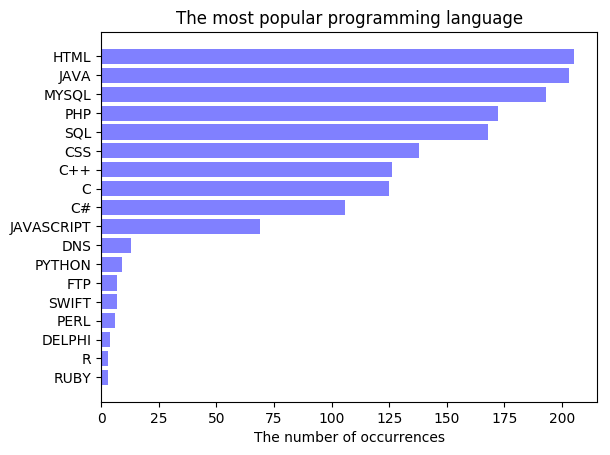

In [71]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(language))
performance = list(language.values())
error = np.random.rand(len(language))

ax.barh(y_pos, performance, align='center',color='#8080ff')
ax.set_yticks(y_pos)
ax.set_yticklabels(language)
ax.invert_yaxis()  
ax.set_xlabel('The number of occurrences')
ax.set_title('The most popular programming language')

plt.show()

In [75]:
pwd


'/home/skydream37/.local/share/Trash/files/languageETL'

In [72]:
# inner_word("https://www.518.com.tw/unity%E5%B7%A5%E7%A8%8B%E5%B8%AB-%E9%AB%98%E9%9B%84%E5%B8%82-%E5%89%8D%E9%8E%AE%E5%8D%80-job-1344470.html?kw=C&pi=1")

In [73]:
# dict= sorted(static.item(), key=lambda d:d[1], reverse = True)
# print(dict)